## Exploratory Data Analysis on my Spotify personal data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Loading and merging the datasets

In [54]:
df_track_features = pd.read_csv('../data/track_features.csv', )
df_stream_hist = pd.read_csv('../data/streaming_history.csv')

In [55]:
df_stream_hist.head()

,endTime,artistName,trackName,msPlayed,track_id
0,2020-12-26 06:02,Calle 13,Tango del Pecado (feat. Bajofondo Tango Club &...,252510,6SEMpMXnOe9nvei4yk7wb7
1,2021-01-10 02:15,Keane,Nothing In My Way,20128,7falOwHJ9MjskdcNehIh79
2,2021-01-11 15:52,Machine Learning en Español,11 Estadística Inferencial,1487699,NaN
3,2021-01-11 16:08,Machine Learning en Español,12 Árboles de Decisión,748200,NaN
4,2021-01-11 17:12,Podcast – Capa 8,#00 – ¿Qué pasó con HTML5 Fácil?,231980,NaN


It will be helpful to work only with one dataframe. Let's get the features into our streaming history by merging both datasets:

In [56]:
df_spotify = df_stream_hist.merge(df_track_features, how='inner', left_on='track_id', right_on='id')
df_spotify.head(1).T

,0
endTime,2021-01-11 17:13
artistName,Danza Invisible
trackName,Agua sin sueño
msPlayed,65107
track_id,1vywengPlpJuJggJ9xOUYB
name,Agua sin sueño
danceability,0.653
energy,0.734
key,0
loudness,-6.138


### 2. Cleaning the data

We'll change some of the column names, in order to have them uniformly presented:

In [57]:
columns_map = {
    'endTime': 'end_time',
    'artistName': 'artist_name',
    'trackName': 'track_name',
    'msPlayed': 'ms_played'
}

df_spotify = df_spotify.rename(columns=columns_map)
df_spotify.columns

Index(['end_time', 'artist_name', 'track_name', 'ms_played', 'track_id',
       'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

The track name and track id are duplicated, let's get rid of one of them:

In [58]:
df_spotify = df_spotify.drop(['name', 'id'], axis=1)
df_spotify.columns

Index(['end_time', 'artist_name', 'track_name', 'ms_played', 'track_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

#### 2.1 Looking for missing values and checking data types

In [59]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1876
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   end_time          1877 non-null   object 
 1   artist_name       1877 non-null   object 
 2   track_name        1877 non-null   object 
 3   ms_played         1877 non-null   int64  
 4   track_id          1877 non-null   object 
 5   danceability      1877 non-null   float64
 6   energy            1877 non-null   float64
 7   key               1877 non-null   int64  
 8   loudness          1877 non-null   float64
 9   mode              1877 non-null   int64  
 10  speechiness       1877 non-null   float64
 11  acousticness      1877 non-null   float64
 12  instrumentalness  1877 non-null   float64
 13  liveness          1877 non-null   float64
 14  valence           1877 non-null   float64
 15  tempo             1877 non-null   float64
 16  type              1877 non-null   object 


As we see, spotify sent us a very complete dataset, and the features extraction through the API was successfully performed [by this process](link to the extraction notebook).

Now it's time to deal with the `object` type for `end_time` feature:

In [60]:
df_spotify['end_time'] = pd.to_datetime(df_spotify['end_time'])
df_spotify.dtypes[:1]  #we knew that end_time was the first feature in the dataset

end_time    datetime64[ns]
dtype: object

#### 2.2 Data enrichment

For EDA porposes, it would be helpful to split the `end_date` columns into year, month, day and hour. This I will be able to answer some certain questions later.

In [61]:
df_spotify['year_played'] = df_spotify['end_time'].dt.year
df_spotify['month_played'] = df_spotify['end_time'].dt.month
df_spotify['day_played'] = df_spotify['end_time'].dt.day
df_spotify['day_of_week_played'] = df_spotify['end_time'].dt.day_name()
df_spotify['hour_played'] = df_spotify['end_time'].dt.hour

In [62]:
df_spotify.head(1).T

,0
end_time,2021-01-11 17:13:00
artist_name,Danza Invisible
track_name,Agua sin sueño
ms_played,65107
track_id,1vywengPlpJuJggJ9xOUYB
danceability,0.653
energy,0.734
key,0
loudness,-6.138
mode,1


### 2. General exploration

In [64]:
#Total songs played
df_spotify.shape[0]

1877

In [106]:
#Converting song duration from miliseconds (ms) to hours
df_spotify['duration_ms'].sum() / 1000 / 3600

118.81229388888889

In [ ]:
#Mean of songs listened by day
df_spotify.shape[0] / 365

5.142465753424657

As we see, I played a total of 1877 non-unique songs during the last 12 months, aproximatley from January 2021 to January 2022, which means a total of 118.8 hours listening to music. This also means the I listened aproximately 5 song per day.

However, I don't listen to music every single day, so let's see the actual listening behavior, looking at the total songs played by month: 

<AxesSubplot:xlabel='month_played'>

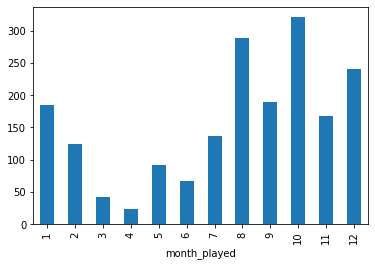

In [99]:
df_grouped = df_spotify[['month_played', 'track_name']].groupby('month_played').count()
df_grouped.plot(kind='bar', legend=False) 

### 3. Answering some questions

#### Q1. What was my top 5 songs played last year?

In [117]:
df_spotify[['track_name', 'artist_name']].value_counts()[:5]

track_name         artist_name  
Billie Bossa Nova  Billie Eilish    15
Oxytocin           Billie Eilish    15
Getting Older      Billie Eilish    13
Smile              Lily Allen       12
my future          Billie Eilish    12
dtype: int64

This is very interesting, I've never herd Billie Eilish before, until Spotify suggested me as a new album release. I listened to it and I got hooked! It's a great album but I didn't imagine that 4 out of 5 songs would be from her.

I didn't expected for Lily Allen's song Smile. It's an old one, I just remembered that it existed and now I'm sorprised that is #4 in my top 5... wow!

#### Q2. Do we have similar results if we look at the top 5 artist?

In [119]:
df_spotify['artist_name'].value_counts()[:5]

Billie Eilish          95
Heroes Del Silencio    38
Los Garbanzos          38
Pearl Jam              28
Mala Rodríguez         25
Name: artist_name, dtype: int64

We would answer yes, and this blows my mind. I listened to Billie Eilish a little more than 2X times than HdS, listening to only __one album__. That's pretty intense.